In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
new_data_profit = pd.read_csv('/content/drive/MyDrive/Data/new_data_profit.csv')
new_row = {'ASIN':'0070331766', 'Group':"Book","Profit":31.90}
new_data_profit.columns = ['ASIN','Group','Profit']

In [7]:
final_data = pd.DataFrame()

In [8]:
new_data_profit = new_data_profit.append(new_row,ignore_index=True)

<ipython-input-8-45af21b42c38>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data_profit = new_data_profit.append(new_row,ignore_index=True)


In [94]:
categories = pd.read_csv('/content/drive/MyDrive/hackrx/categories.csv')
info = pd.read_csv('/content/drive/MyDrive/hackrx/info.csv')
reviews = pd.read_csv('/content/drive/MyDrive/hackrx/reviews.csv')
similar = pd.read_csv('/content/drive/MyDrive/hackrx/similar.csv')
dates = pd.read_csv('/content/drive/MyDrive/Data/reviews1_data.csv')

In [95]:
categories = categories.head(20000)
info = info.head(20000)
reviews = reviews.head(20000)
similar = similar.head(20000)

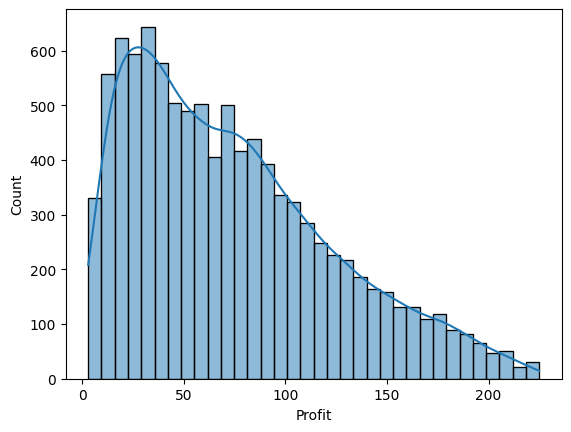

In [96]:
sns.histplot(data=new_data_profit,x='Profit',kde=True)
plt.show()

#Purchase history

In [98]:
dates.head()

,customer id,ASIN,group,day,month,year,rating,votes,helpful,profit,datetime
0,A2YIAL5VY6NC4E,6304819757,Video,22,3,1999,4,15,3,33.9,1999-03-22
1,A36MMGVNBSQIH6,6304819757,Video,16,6,1999,4,16,14,33.9,1999-06-16
2,A2SNH0CM5B8XAW,6304819757,Video,15,8,1999,3,9,5,33.9,1999-08-15
3,A23AGXGTSICSLI,6304819757,Video,23,7,2000,5,17,17,33.9,2000-07-23
4,A34ZVLFQSI8O2I,6304819757,Video,23,2,2001,5,15,13,33.9,2001-02-23


In [100]:
'''
consistent purchase history
'''
from datetime import datetime
dates['datetime'] = pd.to_datetime(dates[['year', 'month', 'day']])

In [101]:
dates.sort_values(['customer id', 'datetime'], inplace=True)

In [102]:
dates['time_difference'] = dates.groupby('customer id')['datetime'].diff()

In [103]:
dates

,customer id,ASIN,group,day,month,year,rating,votes,helpful,profit,datetime,time_difference
116198,A10003PM9DTGHQ,0609807900,Book,18,7,2004,1,14,5,47.52,2004-07-18,NaT
150549,A1001L6GILDZB5,0688140718,Book,8,12,2002,5,21,19,55.50,2002-12-08,NaT
179816,A1001URKW36W4Z,0452276594,Book,24,7,2002,4,11,10,103.95,2002-07-24,NaT
94372,A1001URKW36W4Z,0553502824,Book,18,3,2003,2,1,0,130.39,2003-03-18,237 days
46970,A100307XCCSKWR,0451191145,Book,8,5,2002,4,0,0,81.97,2002-05-08,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
80055,AZZST8OYL5P4Q,0679762833,Book,13,8,2003,3,2,1,161.48,2003-08-13,NaT
192035,AZZST8OYL5P4Q,0679460802,Book,13,8,2003,3,2,1,83.65,2003-08-13,0 days
111605,AZZVITMJDPJXI,0060188790,Book,15,1,2003,2,19,5,66.00,2003-01-15,NaT
156497,AZZVZL4QEHEHO,0380790076,Book,5,11,2003,2,6,3,45.00,2003-11-05,NaT


In [16]:
# dates['time_difference'].fillna(pd.Timedelta(0), inplace=True)

In [104]:
consistency_data = dates.groupby('customer id')['time_difference'].mean()

In [108]:
consistency_data

customer id
A10003PM9DTGHQ        NaT
A1001L6GILDZB5        NaT
A1001URKW36W4Z   237 days
A100307XCCSKWR        NaT
A1004CPY2WJUP8        NaT
                   ...   
AZZRPIKKSH29Q         NaT
AZZST8OYL5P4Q      0 days
AZZVITMJDPJXI         NaT
AZZVZL4QEHEHO         NaT
AZZWWO1TN9EP4         NaT
Name: time_difference, Length: 124856, dtype: timedelta64[ns]

In [110]:
from pandas.core.groupby.ops import NaT
consistency_data[consistency_data.index=="NaT"]

Series([], Name: time_difference, dtype: timedelta64[ns])

In [18]:
# plt.figure(figsize=(10, 6))
# plt.bar(consistency_data.index, consistency_data)
# plt.xlabel('Customer ID')
# plt.ylabel('Average Days Between Purchases')
# plt.title('Consistency of Customer Purchases')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

In [106]:
consistency_data.

TypeError: ignored

In [78]:
consistency_data = consistency_data.apply(lambda x: 0 if pd.isnull(x) else x)

In [81]:
consistency_data = consistency_data.fillna(0, inplace=True)

AttributeError: ignored

In [80]:
final_data['customer'] = consistency_data.index

AttributeError: ignored

In [45]:
final_data['consistency'] = consistency_data

In [48]:
final_data[final_data['consistency'].isnull()]

,customer,consistency
0,A10003PM9DTGHQ,None
1,A1001L6GILDZB5,None
2,A1001URKW36W4Z,None
3,A100307XCCSKWR,None
4,A1004CPY2WJUP8,None
...,...,...
124851,AZZRPIKKSH29Q,None
124852,AZZST8OYL5P4Q,None
124853,AZZVITMJDPJXI,None
124854,AZZVZL4QEHEHO,None


#Total spending

In [49]:
price = pd.read_csv('/content/drive/MyDrive/Data/new_data_profit.csv')
new_row = {'ASIN':'0070331766', 'Group':"Book","Profit":31.90}
price.columns = ['ASIN','Group','Profit']

In [83]:
price

,ASIN,Group,Profit
0,6304819757,Video,33.90
1,0903505355,Book,124.65
2,B00000GAZM,Music,24.40
3,0694007099,Book,43.35
4,B00008GQVU,Music,36.54
...,...,...,...
9995,0786014202,Book,99.12
9996,0070371350,Book,53.04
9997,0141303980,Book,69.42
9998,076480782X,Book,121.66


In [84]:
price = price.append(new_row,ignore_index=True)

<ipython-input-84-ab99de8995fc>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  price = price.append(new_row,ignore_index=True)


In [87]:
reviews.head()

,ASIN,customer id,rating,votes,helpful
0,0827229534,A2JW67OY8U6HHK,5,10,9
1,0827229534,A2VE83MZF98ITY,5,6,5
2,0738700797,A11NCO6YTE4BTJ,5,5,4
3,0738700797,A9CQ3PLRNIR83,4,5,5
4,0738700797,A13SG9ACZ9O5IM,5,8,8


In [85]:
merged_df = price.merge(reviews,on='ASIN',how='inner')

In [61]:
cust_spending = merged_df.groupby('customer id')['Profit'].sum()

In [88]:
cust_spending

customer id
A105B8SVTVDBHU    12.80
A10F29RCFW20DS    12.80
A10L87IJ218XXM    12.80
A10VNC6NOOSG4V    12.80
A1110E06W6VWO3    80.37
                  ...  
AZ91TPS0BRN2A     12.80
AZC6MJTIA2OEL     12.80
AZD7NEVKD2GBX     12.80
AZRW9KDV2X8E8     34.36
AZSN1TO0JI87B     38.40
Name: Profit, Length: 638, dtype: float64

In [89]:
temp_df = pd.DataFrame(columns=['cust id','spend'])

In [90]:
temp_df['cust id'] = cust_spending.index

In [91]:
for i in range(len(cust_spending)):
  temp_df['spend'][i] = cust_spending[i]

In [92]:
temp_df

,cust id,spend
0,A105B8SVTVDBHU,12.8
1,A10F29RCFW20DS,12.8
2,A10L87IJ218XXM,12.8
3,A10VNC6NOOSG4V,12.8
4,A1110E06W6VWO3,80.37
...,...,...
633,AZ91TPS0BRN2A,12.8
634,AZC6MJTIA2OEL,12.8
635,AZD7NEVKD2GBX,12.8
636,AZRW9KDV2X8E8,34.36


<Axes: xlabel='spend', ylabel='Count'>

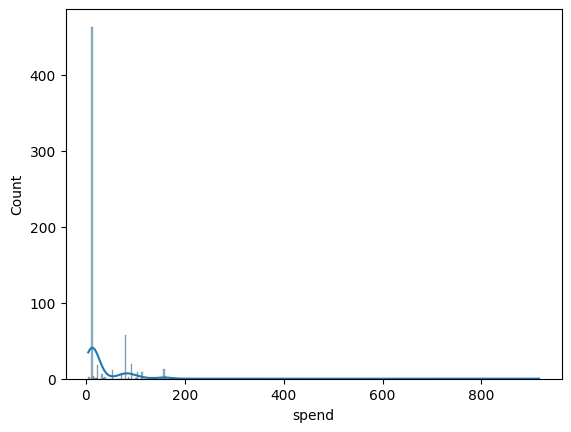

In [114]:
import seaborn as sns
sns.histplot(temp_df,x="spend",kde=2)

In [115]:
Emi_percent = temp_df.copy()

In [116]:
Emi_percent

,cust id,spend
0,A105B8SVTVDBHU,12.8
1,A10F29RCFW20DS,12.8
2,A10L87IJ218XXM,12.8
3,A10VNC6NOOSG4V,12.8
4,A1110E06W6VWO3,80.37
...,...,...
633,AZ91TPS0BRN2A,12.8
634,AZC6MJTIA2OEL,12.8
635,AZD7NEVKD2GBX,12.8
636,AZRW9KDV2X8E8,34.36


In [118]:
bins = [0,100,200,float('inf')]
labels = [10,8,6]

In [119]:
Emi_percent['emi%'] = pd.cut(Emi_percent['spend'], bins = bins, labels=labels,right=False)

In [122]:
Emi_percent.drop(columns='spend',inplace=True)

In [123]:
Emi_percent

,cust id,emi%
0,A105B8SVTVDBHU,10
1,A10F29RCFW20DS,10
2,A10L87IJ218XXM,10
3,A10VNC6NOOSG4V,10
4,A1110E06W6VWO3,10
...,...,...
633,AZ91TPS0BRN2A,10
634,AZC6MJTIA2OEL,10
635,AZD7NEVKD2GBX,10
636,AZRW9KDV2X8E8,10


In [124]:
Emi_percent.to_csv('/content/drive/MyDrive/Emi_percent.csv',index=False)

In [93]:
final_data.head()

,customer,consistency
0,A10003PM9DTGHQ,None
1,A1001L6GILDZB5,None
2,A1001URKW36W4Z,None
3,A100307XCCSKWR,None
4,A1004CPY2WJUP8,None
...,...,...
124851,AZZRPIKKSH29Q,None
124852,AZZST8OYL5P4Q,None
124853,AZZVITMJDPJXI,None
124854,AZZVZL4QEHEHO,None
